In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model


from tensorflow.keras.utils import plot_model


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 10)            5000      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense_6 (Dense)             (None, 10)                60        
                                                                 
Total params: 5,140
Trainable params: 5,140
Non-trainable params: 0
_________________________________________________________________


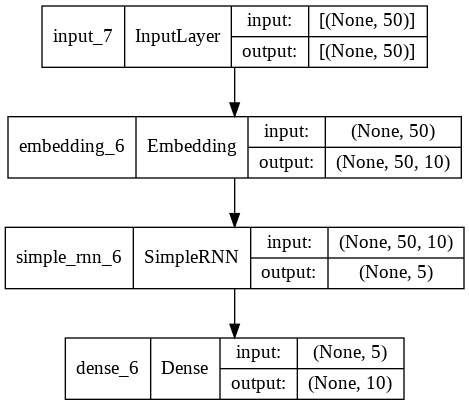

In [10]:
#For Item Sequences

model = keras.Sequential()
model.add(layers.Input(50))#50 items at a time --> Item indices created using rollingf or shift functions
model.add(layers.Embedding(500,10))#Latent vectors -->10

model.add(layers.SimpleRNN(5))#hidden layers in RNN be 5

model.add(layers.Dense(10))#Final output from the Item mblock of code

model.summary()


#Embedder matrix will have 10 laten weights for 500 items

#Rnn layer will be connected with the input and the previous hidden state
#5 layers of the currebt statwe will be connected with 5 layers of the previous state
# 10 dimensions/sequence sample of the each item is connected with the five layers of state 
# Total params 10*5+5*5 + 5 biases 

plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [11]:
# layers.SimpleRNN?
#The 50 sequences will be connected using RNN sytate sharing network and the associative latent dimension of that will be passed to the final layer


#We could have flattened the 50,10 into 50*10 and used an ANN for training some 
# specific associations but we will make use of the sequance patter of the 
# flowing items and hypothesise a presence of 1-D association that is constant 
#across the entire dataset

#If we feel there can be some other association present we can train multiple 
# 1-d convolution maps and then train the data

#Similar approach is followe dto compute graph based netwrok on the user side 

# The results of both are concatenated together and then used for further analysis

# RNN for AR model

In [43]:
s = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1

ar=10
total_ins=s.shape[0]

xx=np.concatenate([
           s[i:total_ins-ar+i].reshape(-1,1) for i in range(9,-1,-1)
],axis=1)

# s[:10],np.roll(s[:10],total_ins-1)

yy=np.roll(xx[:,0],xx[:,0].shape[0]-1)[:-1]#[:xx[:,0].shape[0]-1]
xx=xx[:-1,:]

assert(xx.shape[0]==yy.shape[0])

In [44]:
xx[0],yy[0],s[:15]#Predict xt+1 using previous x10 values

(array([ 0.64370108,  0.81214038,  0.65011819,  0.62254422,  0.4712271 ,
         0.25130879,  0.4634845 ,  0.05358569, -0.1871793 ,  0.0268606 ]),
 0.7543736240289269,
 array([ 0.0268606 , -0.1871793 ,  0.05358569,  0.4634845 ,  0.25130879,
         0.4712271 ,  0.62254422,  0.65011819,  0.81214038,  0.64370108,
         0.75437362,  0.89589452,  0.76708052,  1.05357079,  1.0146414 ]))

In [50]:
xx=xx.reshape(-1,ar,1)#Represent x as explained using 10 features that is sampled ony once--> Word vector sequence formulation
#Significance --> ten values of the sequence will be feeded together, however 
# state will be connected with one sample of observation at a time
#Additionally the states will be connected with the older states

#This goes hand in hand with state equation used in ETS where observations are 
# mapped #one isntance at a time 
from tensorflow.keras.models import Model

i = layers.Input(shape=(ar, 1))#In simple ANN we had ar, and not 2-D ar,1
#  therefore we had ar=10 features input in ANN but here we have 10 data/predictors
# but 1 feature
x = layers.SimpleRNN(15, activation='relu')(i)
x = layers.Dense(1)(x)
model = Model(i, x)


from tensorflow.keras.utils import plot_model

plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 15)                255       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [51]:
#RNN params --> 15*15=225 + 15*1(1 input sample*15 layers for wxh) +15 (biases)